In [1]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_data = getDF('Electronics_5.json.gz')
df_metadata=getDF('meta_Electronics.json.gz')
df_data.to_pickle('df_data.pkl')
df_metadata.to_pickle('df_metadata.pkl')



In [2]:
set_of_categories=set()
list_of_asin_id=[]
for i in range(len(df_metadata)):

    for item in df_metadata.iloc[i]['category']:
        if item=='Wearable Technology':
            list_of_asin_id.append(df_metadata.iloc[i]['asin'])
            continue

print(len(list_of_asin_id))

4261


In [3]:
filtered_df = df_data[df_data['asin'].isin(list_of_asin_id)]
filtered_df_metadata=df_metadata[df_metadata['asin'].isin(list_of_asin_id)]
print(len(filtered_df_metadata))
print(len(filtered_df))
filtered_df_metadata.to_pickle('filtered_df_metadata.pkl')
filtered_df.to_pickle('filtered_df.pkl')

4261
25409


the average rating is 3.9310874099728443
The number of Good reviews are 20541 and the number of bad reviews are 4868
one: 3038
two: 1830
three: 2592
four: 4334
five: 13615


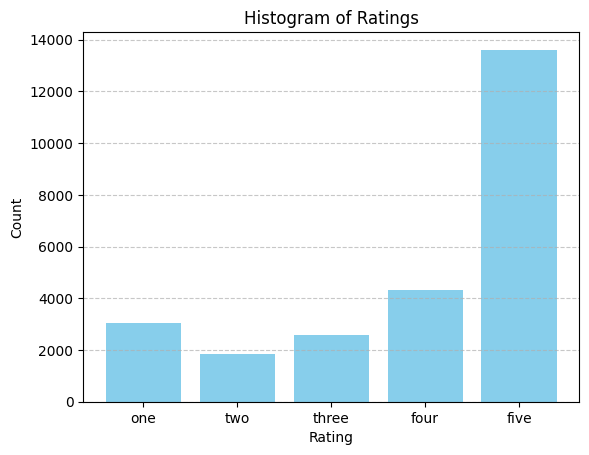

In [4]:
ratings=[]
for x in range (len(filtered_df)):
    ratings.append(filtered_df.iloc[x]['overall'])
print(f'the average rating is {sum(ratings)/len(ratings)}')
Good=0
Bad=0
for x in ratings:
    if (x>=3):
        Good+=1
    else:
        Bad+=1

print(f'The number of Good reviews are {Good} and the number of bad reviews are {Bad}')
one=0
two=0
three=0
four=0
five=0

for x in ratings:
    if x==1:
        one+=1
    elif x==2:
        two+=1
    elif x==3:
        three+=1
    elif x==4:
        four+=1
    elif x==5:
        five+=1

print("one: "+str(one))
print("two: "+str(two))
print("three: "+str(three))
print("four: "+str(four))
print("five: "+str(five))
import matplotlib.pyplot as plt


ratings_counts = {'one': 3038, 'two': 1830, 'three': 2592, 'four': 4334, 'five': 13615}


counts = list(ratings_counts.values())
labels = list(ratings_counts.keys())


plt.bar(labels, counts, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

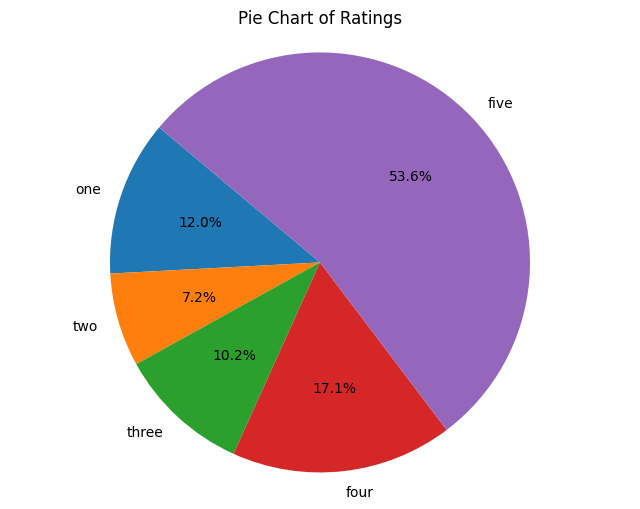

In [5]:
counts = list(ratings_counts.values())
labels = list(ratings_counts.keys())

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Ratings')
plt.show()

In [6]:
asin_to_brand={}

for x in range(len(filtered_df_metadata)):
    asin_to_brand[filtered_df_metadata.iloc[x]['asin']]=filtered_df_metadata.iloc[x]['brand']
    print(filtered_df_metadata.iloc[x]['brand'])

print(len(set(asin_to_brand.values())))
brands=set(asin_to_brand.values())
tally={}
for x in brands:
    tally[x]=0

for x in range(len(filtered_df)):
    tally[asin_to_brand[filtered_df.iloc[x]['asin']]]+=1

VIP
OP/TECH USA
HALOFUN
OP/TECH USA
HALOFUN
ebasy
Senker
Industrial Revolution
Garmin
Harry Potter

Supersonic
JAVENSMARTEQT
Absolute Footy
Qidoou
Apple
Snuza
ZTO
Yamax
Burg
Aeifond
VIP-Top Sales Watch Phone
Vuzix Corp.
Tommy Bahama
Sprigs
Qidoou
Flylinktech
SVP
Niceeshop
WJPILIS
Vafru
WIMM Labs
E-Tree
Koolertron
YiJYi
Sprigs
PQMALL
Pyle
SVP
General
AOKE
ANCwear
SVP
Himtop
LOK8U
Skrohl
Sony
Suunto
Garmin
FTmall
Garmin
Garmin
Sprigs
DreaMall
E-Tree
Garmin
YQT
Sprigs
Qidoou
Chow
instecho
MoKo
MoKo
Intoxicase

Sprigs
COOKOO
CNPGD
Victor
MoKo
MoKo
ApesLoveGadgets
ebasy
ElectricalLand
Pebble
inDigi
COOKOO
Garmin
NeuroSky
EXETECH
COOKOO
Fitbit
Sprigs
Pebble Technology Corp
Aeifond
Garmin
Lacoste
Jawbone
Mindfield Biosystems
Samgogo
E-Tree
Digital_family
Westlinke
Digi Tech products
24kupi
24Kupi
NIXON
GoodRuler
Sprigs
Sprigs
Sprigs
Fitbit
Jawbone
Aeorinia
SEPVER
Garmin
Digital_family
LifeTrak
Fitbit
Digital_family
Casio
Victor
CNPGD
Dozen Mobile
TomTom
TomTom
Fitbit
iHealth
L LARHU
Medicomat

In [7]:
sorted_tally=sorted(tally.items(),key=lambda item: item[1])
print("Top 20 items:")
for key, value in sorted_tally[-20:][::-1]:
    print(f"{key}: {value}")

# Print bottom 20 items
print("\nBottom 20 items:")
for key, value in sorted_tally[:20]:
    print(f"{key}: {value}")

Top 20 items:
Pebble Technology Corp: 1915
Samsung: 1450
Fitbit: 1125
Huawei: 791
I-SMILE: 787
Garmin: 781
Motorola: 680
EUROB: 594
Sony: 544
Asus: 529
Pivotal Living: 525
LG: 520
Apple: 517
Cablor: 478
MoKo: 445
Martian Watches: 433
Microsoft: 371
Dunfire: 369
CreateGreat: 339
Padgene: 278

Bottom 20 items:
YOUDirect: 0
Yijiagou@reg: 0
2014Fashionwatch: 0
KooLuLu: 0
AutumnFall: 0
ETTG: 0
Xing Yongxin Co., Ltd.: 0
overfly: 0
bestpriceam: 0
Fitquipment: 0
24Kupi: 0
AIBODINI: 0
Elechorse: 0
PEMOTech: 0
Sugar Skull Watch: 0
ADiPROD: 0
TOOGOO(R): 0
top4cus: 0
Chongqing Jinou Science and Technology Development Co., Ltd.: 0
BMT: 0


In [8]:
product_id=set(asin_to_brand.keys())
print(len(product_id))
ratings_per_product={}
for x in product_id:
    ratings_per_product[x]=[]

for x in range(len(filtered_df)):
    if filtered_df.iloc[x]['overall']>=3:
        ratings_per_product[filtered_df.iloc[x]['asin']].append(filtered_df.iloc[x]['overall'])
    else:
        ratings_per_product[filtered_df.iloc[x]['asin']].append(0)
for x in product_id:
    ratings_per_product[x]=sum(ratings_per_product[x])

ratings_per_product=sorted(ratings_per_product.items(),key=lambda item: item[1] )
print(ratings_per_product[-1])
asin_most_positively_reviewed=ratings_per_product[-1][0]

4259
('B00BKEQBI0', 3409.0)


In [16]:
for i in range(10):
    print(ratings_per_product[-1-i])

('B00BKEQBI0', 3409.0)
('B00MQ99YB4', 2871.0)
('B00J4DY8RU', 2121.0)
('B00RY1Z9NQ', 1885.0)
('B01FDPW1NK', 1883.0)
('B013LKLS2E', 1822.0)
('B00BGO0Q9O', 1716.0)
('B0106IS5XY', 1494.0)
('B00NC8PMUK', 1456.0)
('B01ESSDBL4', 1436.0)


4259


In [9]:
index_most_pos=-1
for x in range(len(filtered_df_metadata)):

    if filtered_df_metadata.iloc[x]['asin']==asin_most_positively_reviewed:
        index_most_pos=x
        print(filtered_df_metadata.iloc[x])

category            [Electronics, Wearable Technology, Smartwatches]
tech1                                                               
description                [Pebble 1.5 Black -Retail., <b>NOTE:</b>]
fit                                                                 
title                                        Pebble Smartwatch Black
also_buy           [B00HVL6KWS, B00B11AWUU, B01LW2RD2I, B01KM4NCP...
tech2                                                               
brand                                         Pebble Technology Corp
feature            [View notifications from email, SMS, Caller ID...
rank               [>#77,968 in Cell Phones & Accessories (See To...
also_view          [B01KM4NJQA, B0106IS5XY, B01KM4NCP8, B01KM4NAV...
main_cat                                   Cell Phones & Accessories
similar_item        class="a-bordered a-horizontal-stripes  a-spa...
date                                                                
price                             

In [10]:
most_popular_year_product={}
for x in range(len(filtered_df)):
    if filtered_df.iloc[x]['asin']==asin_most_positively_reviewed:
        if filtered_df.iloc[x]['reviewTime'].split(" ")[-1] in most_popular_year_product:
            most_popular_year_product[filtered_df.iloc[x]['reviewTime'].split(" ")[-1]]+=1
        else:
            most_popular_year_product[filtered_df.iloc[x]['reviewTime'].split(" ")[-1]]=1

print(most_popular_year_product)

{'2018': 12, '2017': 47, '2016': 156, '2015': 349, '2014': 317, '2013': 81}


In [11]:
review_number_of_customers={}
for x in range(len(filtered_df)):
    if filtered_df.iloc[x]['reviewTime'].split(" ")[-1] in review_number_of_customers:
        review_number_of_customers[filtered_df.iloc[x]['reviewTime'].split(" ")[-1]]+=1
    else:
        review_number_of_customers[filtered_df.iloc[x]['reviewTime'].split(" ")[-1]]=1

print(review_number_of_customers)

{'2008': 3, '2015': 5475, '2014': 2079, '2013': 283, '2012': 47, '2010': 7, '2009': 1, '2011': 11, '2017': 5840, '2016': 9328, '2018': 2335}


In [12]:
import os
import string
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess_text(text):
    text=str(text)
    # Lowercase the text
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove blank space tokens
    tokens = [token for token in tokens if token.isalnum()]

    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

preprocessed=[]
for x in range(len(filtered_df)):
    preprocessed.append(preprocess_text(filtered_df.iloc[x]['reviewText']))


In [15]:
import pickle
data=ratings
with open('ratings.pkl', 'wb') as f:
    pickle.dump(data, f)


In [20]:
filtered_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
228886,5.0,3,True,"07 18, 2008",AKF4PIEHJ8XFN,B0001TST6W,{'Size:': ' Regular'},magil,Works much better than the webbing for me -- I...,I should have bought this earlier -- great!,1216339200,NaN
228887,4.0,NaN,True,"10 14, 2015",A1WHW9IL5TRNJX,B0001TST6W,{'Size:': ' X-Long'},Michael M.,Works very well for my camera,Four Stars,1444780800,NaN
228888,5.0,NaN,True,"09 23, 2015",A2O51JASLKFRCS,B0001TST6W,{'Size:': ' X-Long'},jimbo,"If you are on the big or tall side, the extra ...",This is much more comfortable for me,1442966400,NaN
228889,5.0,NaN,True,"03 9, 2015",A1C65W6AGJ0LCH,B0001TST6W,{'Size:': ' X-Long'},L. R. Smith,Longer straps work better for carrying my came...,Works as stated,1425859200,NaN
228890,5.0,NaN,False,"06 20, 2014",A2ZA6DRL0A1LNZ,B0001TST6W,{'Size:': ' X-Long'},Sean,"I have a few Op/Tech straps, and being able to...",Op/Tech system is great,1403222400,NaN
